
First we will pre-process the categorical features and then the numerical features on all the 3 available tables.


## `PREPROCESSING: CATEGORICAL FEATURES`

- Find out and impute, if we have missing values in the categorical features.
- Remove the features which do not add much information
- Choose an Encoding technique to convert categorical feature into numeric.


In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

---
### `DATASET 1: Weekly Sales Data` has the following features

- **WEEK_END_DATE** - week date
- **STORE_NUM** - store number
- **UPC** - (Universal Product Code) product specific identifier
- **BASE_PRICE** - base price of item
- **DISPLAY** - product was a part of in-store promotional display
- **FEATURE** - product was in in-store circular
- **UNITS** - units sold (target)

---

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35



###  `WEEKLY SALES DATA`  has the following categorical features

    - STORE_NUM
    - UPC
    - FEATURE
    - DISPLAY


In [4]:
data[['STORE_NUM', 'UPC', 'FEATURE', 'DISPLAY']].isna().sum()

STORE_NUM    0
UPC          0
FEATURE      0
DISPLAY      0
dtype: int64

***No Null Values***


 -  `STORE_NUM` - No changes required as it is a key and will be used to merge tables later.
 -  `UPC      ` - No changes required as it is a key and will be used to merge tables later.
 -  `FEATURE  ` - No Preprocessing Required
 -  `DISPLAY  ` - No Preprocessing Required




### `DATASET 2: PRODUCT DATA` contains the following details about the products

- **UPC** - (Universal Product Code) product specific identifier
- **DESCRIPTION**	- product description
- **MANUFACTURER** - product	manufacturer
- **CATEGORY** - category of product
- **SUB_CATEGORY** - sub-category of product
- **PRODUCT_SIZE** - package size or quantity of product


In [5]:
product_data = pd.read_csv('product_data.csv')

In [6]:
product_data.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML



### `PRODUCT DATA`  has the following categorical features

    - UPC
    - DESCRIPTION
    - MANUFACTURER
    - CATEGORY
    - SUB_CATEGORY
    - PRODUCT_SIZE
 

In [7]:
product_data.shape

(30, 6)

In [8]:
product_data[['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY', 'PRODUCT_SIZE']].isna().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

***No Null Values***

In [9]:
product_data.DESCRIPTION.nunique()

29

In [10]:
product_data.MANUFACTURER.nunique()

9

In [11]:
product_data.CATEGORY.nunique()

4

In [12]:
product_data.SUB_CATEGORY.nunique()

7

In [13]:
product_data.PRODUCT_SIZE.nunique()

16

 - `DESCRIPTION` - In the description, we have category, subcategory and size of the product and these are already present in the other features as well. So, We will drop this feature as it will not add much value to the model.
 - `MANUFACTURER`, `CATEGORY`, `SUB_CATEGORY`- As, there is no order in the given categories, so we will One Hot Encode this features.
 - `PRODUCT_SIZE` - The product size units are different for different categories of products. For oral hygiene products product size are 500 ML and 1L. So we will convert them into OZ

In [14]:
#Dropping Description feature
product_data = product_data.drop(columns= ['DESCRIPTION'])

In [15]:
product_data

,UPC,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
5,1111085319,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
6,1111085345,PRIVATE LABEL,COLD CEREAL,ADULT CEREAL,20 OZ
7,1111085350,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
8,1111087395,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,32.7 OZ
9,1111087396,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,30.5 OZ


In [16]:
product_data['PRODUCT_SIZE'] = product_data.PRODUCT_SIZE.apply(lambda x: x.split()[0])

In [17]:
# changing data type of product size from string to float
product_data.PRODUCT_SIZE = product_data.PRODUCT_SIZE.astype(float)

In [18]:
product_data.groupby(['CATEGORY'])['PRODUCT_SIZE'].unique()

CATEGORY
BAG SNACKS                                  [15.0, 16.0, 10.0]
COLD CEREAL              [12.25, 20.0, 18.0, 12.0, 15.0, 12.2]
FROZEN PIZZA              [32.7, 30.5, 29.6, 29.8, 28.3, 22.7]
ORAL HYGIENE PRODUCTS                             [500.0, 1.0]
Name: PRODUCT_SIZE, dtype: object

In [19]:
product_data.head()

,UPC,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PRIVATE LABEL,BAG SNACKS,PRETZELS,15.0
1,1111009497,PRIVATE LABEL,BAG SNACKS,PRETZELS,15.0
2,1111009507,PRIVATE LABEL,BAG SNACKS,PRETZELS,15.0
3,1111038078,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500.0
4,1111038080,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500.0


In [20]:
product_data['PRODUCT_SIZE'][product_data['PRODUCT_SIZE']==500.0]

3    500.0
4    500.0
Name: PRODUCT_SIZE, dtype: float64

In [21]:
product_data['PRODUCT_SIZE'][product_data['PRODUCT_SIZE']==1.00]

16    1.0
17    1.0
28    1.0
29    1.0
Name: PRODUCT_SIZE, dtype: float64

##### As ORAL HYGIENE PRODUCTS comes in two size 500 ml and 1 L , converting then to oz as other products

In [22]:
product_data['PRODUCT_SIZE'].replace({500.00:17.00, 1.00:34.00},inplace =True)

In [23]:
OHE_p = ce.OneHotEncoder(cols= ['MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'])

In [24]:
product_data = OHE_p.fit_transform(product_data)

In [25]:
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0


In [26]:
product_data.shape

(30, 22)

In [27]:
product_data.columns

Index(['UPC', 'MANUFACTURER_1', 'MANUFACTURER_2', 'MANUFACTURER_3',
       'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6', 'MANUFACTURER_7',
       'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1', 'CATEGORY_2',
       'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1', 'SUB_CATEGORY_2',
       'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5', 'SUB_CATEGORY_6',
       'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')

---
### `DATASET 3: STORE DATA`

- **STORE_ID** - store number
- **STORE_NAME** - Name of store
- **ADDRESS_CITY_NAME** - city
- **ADDRESS_STATE_PROV_CODE** - state
- **MSA_CODE** - (Metropolitan Statistical Area) Based on geographic region and population density
- **SEG_VALUE_NAME** - Store Segment Name
- **PARKING_SPACE_QTY** - number of parking spaces in the store parking lot
- **SALES_AREA_SIZE_NUM** - square footage of store
- **AVG_WEEKLY_BASKETS** - average weekly baskets sold in the store

---

In [28]:
store_data = pd.read_csv('store_data.csv')

In [29]:
store_data.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053



### `STORE DATA`  has the following categorical features

    - STORE_ID
    - STORE_NAME
    - ADDRESS_CITY_NAME
    - ADDRESS_STATE_PROV_CODE
    - MSA_CODE
    - SEG_VALUE_NAME
    

In [30]:
store_data.shape

(76, 9)

In [31]:
store_data[['STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME', 'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME']].isna().sum()

STORE_ID                   0
STORE_NAME                 0
ADDRESS_CITY_NAME          0
ADDRESS_STATE_PROV_CODE    0
MSA_CODE                   0
SEG_VALUE_NAME             0
dtype: int64

In [32]:
store_data.STORE_NAME.nunique()

72

In [33]:
store_data.ADDRESS_CITY_NAME.nunique()

51

In [34]:
store_data.ADDRESS_STATE_PROV_CODE.nunique()

4

In [35]:
store_data.MSA_CODE.nunique()

9

In [36]:
store_data.SEG_VALUE_NAME.nunique()

3


   - `STORE_ID` - No changes required as it is a key and will be used to merge files later.
   - `STORE_NAME` -Out of 76 different stores we have 72 unique store names. 
   - `ADDRESS_CITY_NAME` - Since, Out of 76 different stores we have 51 unique address city names, So we will drop this feature due to high cardinality
   - `ADDRESS_STATE_PROV_CODE`, `MSA_CODE` - As, there is no order in the given categories, So, we will One Hot Encode this variable.
   - `SEG_VALUE_NAME` - Since upstream. mainstream and value stores have order 
 we will map VALUE AS 1, MAINSTREAM AS 2 and UPSCALE AS 3.

In [37]:
store_data = store_data.drop(columns=['STORE_NAME', 'ADDRESS_CITY_NAME'])

In [38]:
OHE = ce.OneHotEncoder(cols=['ADDRESS_STATE_PROV_CODE', 'MSA_CODE'])

store_data.SEG_VALUE_NAME = store_data.SEG_VALUE_NAME.map({'VALUE': 1, 'MAINSTREAM' : 2, 'UPSCALE': 3})

In [39]:
store_data = OHE.fit_transform(store_data)

In [40]:
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


In [41]:
store_data.shape

(76, 18)

In [42]:
store_data.columns

Index(['STORE_ID', 'ADDRESS_STATE_PROV_CODE_1', 'ADDRESS_STATE_PROV_CODE_2',
       'ADDRESS_STATE_PROV_CODE_3', 'ADDRESS_STATE_PROV_CODE_4', 'MSA_CODE_1',
       'MSA_CODE_2', 'MSA_CODE_3', 'MSA_CODE_4', 'MSA_CODE_5', 'MSA_CODE_6',
       'MSA_CODE_7', 'MSA_CODE_8', 'MSA_CODE_9', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [43]:
store_data.loc[0]

STORE_ID                       367.0
ADDRESS_STATE_PROV_CODE_1        1.0
ADDRESS_STATE_PROV_CODE_2        0.0
ADDRESS_STATE_PROV_CODE_3        0.0
ADDRESS_STATE_PROV_CODE_4        0.0
MSA_CODE_1                       1.0
MSA_CODE_2                       0.0
MSA_CODE_3                       0.0
MSA_CODE_4                       0.0
MSA_CODE_5                       0.0
MSA_CODE_6                       0.0
MSA_CODE_7                       0.0
MSA_CODE_8                       0.0
MSA_CODE_9                       0.0
SEG_VALUE_NAME                   1.0
PARKING_SPACE_QTY              196.0
SALES_AREA_SIZE_NUM          24721.0
AVG_WEEKLY_BASKETS           12707.0
Name: 0, dtype: float64


## `PREPROCESSING: NUMERICAL FEATURES`

- Check and impute the missing values in the numerical features.
- Check for the outliers and treat them.



### `WEEKLY SALES DATA`

In [44]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35


---

### `WEEKLY SALES DATA`  has the following numerical features

    - BASE_PRICE
    - UNITS (Target)
    
---    

In [45]:
data[[ 'BASE_PRICE', 'UNITS']].isna().sum()

BASE_PRICE    12
UNITS          0
dtype: int64

***Imputing the missing values in the Base Price***


In [46]:
avg_price = data.groupby(['STORE_NUM'])['BASE_PRICE'].mean().reset_index()

In [47]:
avg_price

,STORE_NUM,BASE_PRICE
0,367,3.499898
1,389,3.358673
2,613,3.215832
3,623,3.377301
4,2277,3.590999
...,...,...
71,26981,3.324225
72,26983,3.649486
73,27175,3.324431
74,28909,3.560000


In [48]:
data.loc[data.BASE_PRICE.isna() == True]

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
279,14-Jan-09,4245,1111087395,NaN,0,1,56
280,14-Jan-09,4245,1111087398,NaN,0,1,72
301,14-Jan-09,4259,1111087395,NaN,0,1,52
303,14-Jan-09,4259,1111087398,NaN,0,1,52
1918,21-Jan-09,4245,1111087395,NaN,0,1,52
1919,21-Jan-09,4245,1111087398,NaN,0,1,82
1940,21-Jan-09,4259,1111087395,NaN,0,1,28
3555,28-Jan-09,4245,1111087395,NaN,1,1,45
3556,28-Jan-09,4245,1111087398,NaN,1,1,34
3577,28-Jan-09,4259,1111087395,NaN,1,1,31


In [49]:
def fill_base_price(x) :
    return avg_price.BASE_PRICE[(avg_price.STORE_NUM == x['STORE_NUM'])].values[0]

In [50]:
data.BASE_PRICE[data.BASE_PRICE.isna() == True] = data[data.BASE_PRICE.isna() == True].apply(fill_base_price, axis=1)

<IPython.core.display.Javascript object>


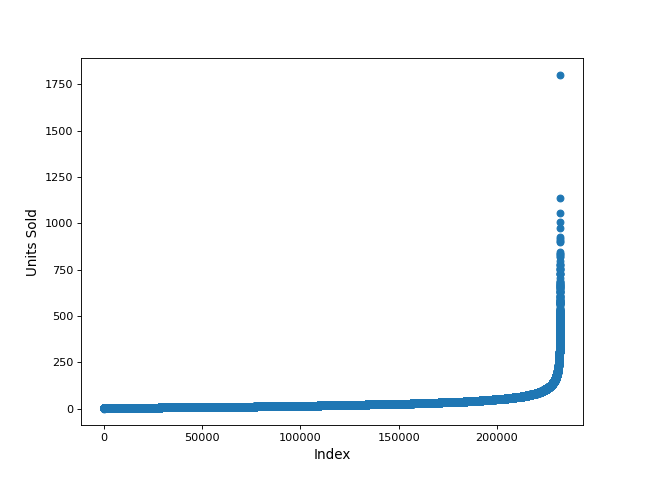

In [51]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(x = range(data.shape[0]), y = np.sort(data['UNITS'].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

In [52]:
data['UNITS'][data.UNITS > 750].shape[0]

21


* We can see that, there are a some points above where UNITS are more than 750 and there number is only 21. So, we can remove them as there number is only 21 and will not affect the data 

In [53]:
data.shape

(232287, 7)

In [54]:
data['UNITS'][data.UNITS > 750]

6579       834
6655       796
6703       773
6833       925
6941       760
6969       899
7087       902
7533       833
7893      1006
7960      1800
8151       774
9597      1054
11209     1136
48005      843
50912      913
60851      755
110911     751
114190     823
135033     781
214827     819
215699     974
Name: UNITS, dtype: int64

In [55]:
data.drop(data[data['UNITS'] > 750].index, axis = 0, inplace= True)

In [56]:
data[data.UNITS > 750].shape[0]

0

---

### `PRODUCT DATA`

---

In [57]:
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0



### `PRODUCT DATA`  has the following numerical feature

    - This dataset has no numerical feature.


---

### `STORE DATA`

---

In [58]:
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053



### `STORE DATA`  has the following numerical features

    - PARKING_SPACE_QTY
    - SALES_AREA_SIZE_NUM
    - AVG_WEEKLY_BASKETS   

In [59]:
store_data.shape

(76, 18)

In [60]:
store_data[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS']].isna().sum()

PARKING_SPACE_QTY      51
SALES_AREA_SIZE_NUM     0
AVG_WEEKLY_BASKETS      0
dtype: int64

- `PARKING_SPACE_QTY` - Check its correlation with the `SALES_AREA_SIZE_NUM`

In [61]:
store_data[['PARKING_SPACE_QTY','SALES_AREA_SIZE_NUM']].corr()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM
PARKING_SPACE_QTY,1.000000,0.763274
SALES_AREA_SIZE_NUM,0.763274,1.000000


Since the correlation of the **PARKING_SPACE_QTY** with **SALES_AREA_SIZE_NUM** is high so we can drop this column as it will not add much value to the model.

In [62]:
store_data = store_data.drop(columns=['PARKING_SPACE_QTY'])

In [63]:
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,81958,54053


In [64]:
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,15.0
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,17.0


In [65]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35



### `SAVE THE UPDATED FILES`


In [66]:
data.to_csv('updated_train_data.csv',index=False)
product_data.to_csv('updated_product_data.csv',index=False)
store_data.to_csv('updated_store_data.csv',index=False)